## PCA 기본

#### svd를 이용해 PCA 원리를 알아보자.

In [154]:
# 임의의 데이터 셋 생성
import numpy as np
np.random.seed(40)
X = np.empty((5, 3))
X[:, 0] = np.random.randint(10, size=5)
X[:, 1] = np.random.randint(10, size=5)
X[:, 2] = np.random.randint(10, size=5)

In [155]:
# X의 각 컬럼 평균이 0이 되도록 한 뒤, svd를 한다. 
X_centered = X - X.mean(axis=0) # column별 평균. axis 지정 없으면 모든 원소의 평균 산출
U, s, Vt = np.linalg.svd(X_centered)

# V의 컬럼 벡터가 바로 principal component를 나타낸다. c1과 c2가 이루는 공간이 데이터의 분산을 최대로 하는 2D 공간이다.
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

svd의 결과를 확인해보자.

In [156]:
# s는 행렬이 아니라, singular values의 배열이다.
s

array([8.79689728, 3.36178969, 0.33610766])

In [157]:
# s를 대각 행렬로 만들어주자.
m, n = X.shape
S = np.zeros((m,n))
S[:n, :n] = np.diag(s) # diag()는 원소 배열을 받아서 대칭행렬을 만들어준다.

In [158]:
# np.allclose()는 두 행렬의 각 원소가 '거의' 같다면 True를 산출한다.
np.allclose(X_centered, U.dot(S).dot(Vt))

True

이제 training set을 2D로 투사한 행렬을 구해보자. <br>
방법은 principal component 벡터들로 내적하면 된다.

In [159]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

각각의 주성분이 전체 데이터 셋의 분산을 어느 정도 설명하는지 구해보자.

In [160]:
np.square(s) / np.square(s).sum()

array([0.87145723, 0.12727061, 0.00127217])

#### sklearn을 이용한 PCA

In [142]:
import numpy as np
np.random.seed(40)
X = np.empty((5, 3))
X[:, 0] = np.random.randint(10, size=5)
X[:, 1] = np.random.randint(10, size=5)
X[:, 2] = np.random.randint(10, size=5)

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [144]:
# components_에서 principal components로 접근 가능. principal components가 로우 벡터로 들어있음에 유의.
pca.components_

array([[-0.29149684,  0.40247035,  0.86778293],
       [-0.1040623 , -0.91513828,  0.38947781]])

svd를 이용한 PCA 결과와 비교해보자. <br>
데이터 셋에 따라서는 일부 축의 부호가 반대가 되기도 한다.

In [147]:
X2D

array([[ 2.4340759 ,  2.16682155],
       [-1.731023  ,  1.41998629],
       [ 6.47349035, -1.52585194],
       [-4.22339827, -0.76764772],
       [-2.95314499, -1.29330819]])

In [148]:
X2D_using_svd

array([[-2.4340759 ,  2.16682155],
       [ 1.731023  ,  1.41998629],
       [-6.47349035, -1.52585194],
       [ 4.22339827, -0.76764772],
       [ 2.95314499, -1.29330819]])

In [152]:
# 각각의 축이 분산을 얼마나 설명하는지 알아보자.
pca.explained_variance_ratio_

# 해석: 제1주성분이 데이터 셋 전체 분산의 87%를 설명한다. 

array([0.87145723, 0.12727061])

In [153]:
# 2D로 투영하면서 분산의 0.1% 정도 손실했다.
1 - pca.explained_variance_ratio_.sum()

0.0012721662080202867

In [161]:
# 이 역시 svd로 구한 결과와 다르지 않다.
np.square(s) / np.square(s).sum()

array([0.87145723, 0.12727061, 0.00127217])

#### 몇 차원으로 감소시킬지 정하기

차원 감소는 분산을 많이 잃지 않는 선에서 하는 것이 좋다. 예) 95% <br>
몇 차원으로 감소시킬지 transform 매서드를 이용하기 전에 미리 계산해보자.

In [170]:
pca = PCA()
pca.fit(X)

# np.cumsum은 누적 합을 계산한 배열을 반환한다.
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.87145723, 0.99872783, 1.        ])

In [171]:
# np.argmax는 최댓값의 인덱스를 반환한다. 
# 단 최댓값이 여러 개 있을 경우, 앞 원소의 인덱스가 반환된다.
d = np.argmax(cumsum >=0.95) + 1
d # d차원으로 투영하면 95% 이상의 분산을 유지할 수 있다.

2

In [183]:
pca = PCA(d)
pca.fit_transform(X)

array([[ 2.4340759 ,  2.16682155],
       [-1.731023  ,  1.41998629],
       [ 6.47349035, -1.52585194],
       [-4.22339827, -0.76764772],
       [-2.95314499, -1.29330819]])

분산 설명력 95%를 유지하는 또 다른 방법

In [184]:
pca = PCA(0.95)
pca.fit_transform(X)

array([[ 2.4340759 ,  2.16682155],
       [-1.731023  ,  1.41998629],
       [ 6.47349035, -1.52585194],
       [-4.22339827, -0.76764772],
       [-2.95314499, -1.29330819]])

그림을 보고 어디까지 차원을 감소시킬지 판단하자

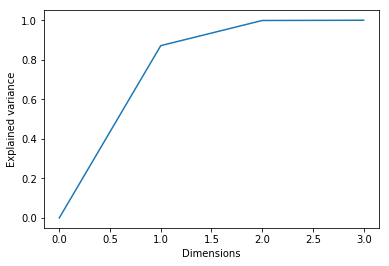

In [197]:
import matplotlib.pyplot as plt

plt.plot(range(len(cumsum)+1), [0]+list(cumsum))
plt.ylabel('Explained variance')
plt.xlabel('Dimensions')
plt.show()

#### 차원 축소 복원하기
(projection matrix) = (original data)(n_components=d matrix) <br>
(projection matrix)(n_components=d matrix).T = (recovered data)

In [201]:
np.random.seed(40)
X = np.empty((5, 3))
X[:, 0] = np.random.randint(10, size=5)
X[:, 1] = np.random.randint(10, size=5)
X[:, 2] = np.random.randint(10, size=5)
X

array([[6., 2., 7.],
       [7., 1., 3.],
       [5., 7., 9.],
       [8., 2., 0.],
       [8., 3., 1.]])

In [202]:
# pca.inverse_transform 매서드 사용.

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[5.86499014, 1.99670203, 6.95617843],
       [7.15682069, 1.00383075, 3.05090095],
       [5.07178169, 7.00175345, 9.02329894],
       [8.11099042, 2.00271123, 0.03602533],
       [7.79541705, 2.99500253, 0.93359635]])

보다시피 약간의 정보 손실이 있다.

In [203]:
np.allclose(X, X_recovered)

False

정보 손실의 측도를 재구성 오차(reconstruction error)라 하며, 다음과 같이 구한다.

In [205]:
np.mean(np.sum(np.square(X_recovered - X), axis=1))

0.022593671854439234

svd 방식으로도 재구성해보자.

In [212]:
X2D_using_svd.dot(Vt[:2, :]) + X.mean(axis=0)

array([[5.86499014, 1.99670203, 6.95617843],
       [7.15682069, 1.00383075, 3.05090095],
       [5.07178169, 7.00175345, 9.02329894],
       [8.11099042, 2.00271123, 0.03602533],
       [7.79541705, 2.99500253, 0.93359635]])

## p.276 이하에서는 데이터 셋이 클 경우 사용할 수 있는 방법과 매니폴드 학습 등을 다룬다.